In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [4]:
data = pd.read_csv("AAPL.csv")

In [6]:
data.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


# Consider Close as a forecasting variable

In [10]:
dataFiltered = data.reset_index()['close']
dataFiltered

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

# Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dataFiltered=scaler.fit_transform(np.array(dataFiltered).reshape(-1,1))

# splitting dataset into train and test split

In [48]:
##splitting dataset into train and test split
training_size=int(len(dataFiltered)*0.7)
test_size=len(dataFiltered)-training_size
train_data,test_data=dataFiltered[0:training_size,:],dataFiltered[training_size:len(dataFiltered),:1]

In [49]:
test_data.shape

(378, 1)

# Create a Step Dataset

In [50]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [51]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [52]:

print(X_train.shape), print(y_train.shape)

(779, 100)
(779,)


(None, None)

# Reshape input to be [samples, time steps, features] which is required for LSTM

In [53]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Build Model

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [55]:
model = Sequential()
model.add(LSTM(100,return_sequences=True,input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\Vineeth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,251 (356.45 KB)

 Trainable params: 91,251 (356.45 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0265 - val_loss: 0.0379
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0028 - val_loss: 0.0169
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0013 - val_loss: 0.0105
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0010 - val_loss: 0.0107
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - loss: 9.6732e-04 - val_loss: 0.0071
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 7.8241e-04 - val_loss: 0.0067
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 7.2848e-04 - val_loss: 0.0069
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 6.7342e-04 - val_loss: 0.0068
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 6.4392e-04 - val_loss: 0.0057
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 6.6290e-04 - val_loss: 0.0062
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - loss: 6.3408e-04 - val_loss: 0.0060
Epoch 12/100
13/1

# prediction and check performance metrics

In [57]:

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


# Transformback to original form

In [58]:
#
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# Calculate RMSE performance metrics

In [60]:
#
import math
from sklearn.metrics import mean_squared_error,r2_score
print(math.sqrt(mean_squared_error(y_train,train_predict)))


152.01080177923322


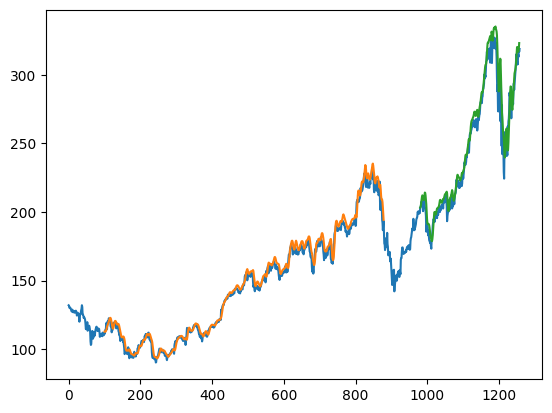

In [61]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(dataFiltered)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataFiltered)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(dataFiltered)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataFiltered))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [65]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [66]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [67]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.0081087]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

In [68]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [69]:
len(dataFiltered)

1258

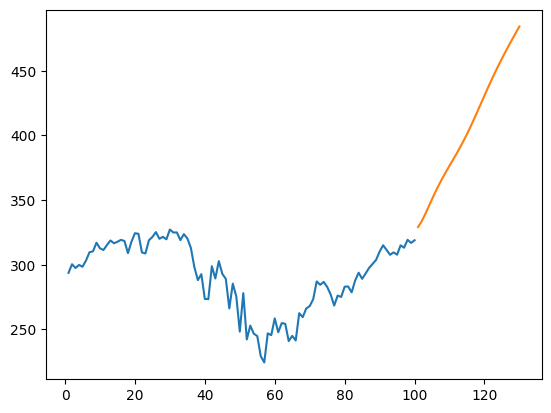

In [70]:
plt.plot(day_new,scaler.inverse_transform(dataFiltered[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))